## 보스턴 집값 경진대회

- https://dacon.io/competitions/open/236065/overview/description


- CRIM: 도시별 1인당 범죄율


- ZN: 25,000 피트를 초과하는 주거용 토지의 비율


- NDUS: 비상업 면적의 비율


- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)


- NOX: 일산화질소 농도


- RM: 주택당 평균 방의 개수


- AGE: 1940년 이전에 건축된 자가주택의 비율


- DIS: 5개의 보스턴 고용 센터와의 거리


- RAD: 고속도로 접근성 지수


- TAX: 10,000달러당 재산세율


- PTRATIO: 도시별 교사와 학생 수 비율


- B: 마을의 흑인 거주 비율


- LSTAT: 하위 계층의 비율


- MEDV: 본인 소유의 주택 가격(중앙값, 단위: 천달러)

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm

house = pd.read_csv('./Boston Housing 데이터/train.csv')
house


,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,TRAIN_000,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,TRAIN_001,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,TRAIN_002,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
3,TRAIN_003,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
4,TRAIN_004,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,TRAIN_450,0.33983,22.0,5.86,0.0,0.431,6.108,34.9,8.0555,7.0,330.0,19.1,390.18,9.16,24.3
451,TRAIN_451,3.83684,0.0,18.10,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19,19.9
452,TRAIN_452,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
453,TRAIN_453,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,20.5


In [2]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.659998,11.165934,11.092747,0.065934,0.555160,6.285352,68.320440,3.788439,9.551648,407.892308,18.453846,356.285714,12.604967,22.574725
std,8.888075,22.953757,6.821697,0.248440,0.116524,0.699346,27.893807,2.082031,8.718624,169.446805,2.149137,92.664335,7.090388,9.120759
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079230,0.000000,5.160000,0.000000,0.449000,5.881000,44.700000,2.100350,4.000000,278.000000,17.400000,375.990000,6.970000,17.100000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.208000,76.700000,3.199200,5.000000,330.000000,19.000000,391.700000,11.280000,21.200000
75%,3.685665,12.500000,18.100000,0.000000,0.624000,6.627000,93.850000,5.164950,24.000000,666.000000,20.200000,396.375000,16.695000,25.100000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


In [3]:
print(house.groupby('CHAS')[['MEDV']].describe().unstack('CHAS'))

             CHAS
MEDV  count  0.0     425.000000
             1.0      30.000000
      mean   0.0      22.134824
             1.0      28.806667
      std    0.0       8.762722
             1.0      11.690165
      min    0.0       5.000000
             1.0      13.400000
      25%    0.0      16.700000
             1.0      21.700000
      50%    0.0      21.000000
             1.0      23.850000
      75%    0.0      24.800000
             1.0      33.175000
      max    0.0      50.000000
             1.0      50.000000
dtype: float64


In [4]:
print(house.RAD.value_counts())
print(house.groupby('RAD')[['MEDV']].describe().unstack('RAD'))

24.0    119
5.0     106
4.0      96
3.0      36
6.0      25
2.0      21
8.0      20
1.0      18
7.0      14
Name: RAD, dtype: int64
             RAD 
MEDV  count  1.0      18.0
             2.0      21.0
             3.0      36.0
             4.0      96.0
             5.0     106.0
                     ...  
      max    5.0      50.0
             6.0      24.8
             7.0      42.8
             8.0      50.0
             24.0     50.0
Length: 72, dtype: float64


In [5]:
#상관관계 분석
house.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_28408\3222390172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.196246,0.404043,-0.053530,0.410551,-0.212673,0.349981,-0.375011,0.614488,0.570890,0.287082,-0.384054,0.444276,-0.386511
ZN,-0.196246,1.000000,-0.525693,-0.025098,-0.505469,0.317844,-0.556758,0.647406,-0.306968,-0.316827,-0.388047,0.181655,-0.416454,0.376084
INDUS,0.404043,-0.525693,1.000000,0.057221,0.759181,-0.391466,0.638347,-0.702260,0.603900,0.730394,0.373639,-0.369784,0.608342,-0.483034
CHAS,-0.053530,-0.025098,0.057221,1.000000,0.081192,0.121848,0.069445,-0.089970,-0.006660,-0.033841,-0.118460,0.043095,-0.064032,0.181734
NOX,0.410551,-0.505469,0.759181,0.081192,1.000000,-0.306085,0.730537,-0.762721,0.609330,0.666784,0.175569,-0.385323,0.597259,-0.433293
RM,-0.212673,0.317844,-0.391466,0.121848,-0.306085,1.000000,-0.245285,0.210719,-0.214426,-0.299118,-0.354118,0.131836,-0.611582,0.697426
AGE,0.349981,-0.556758,0.638347,0.069445,0.730537,-0.245285,1.000000,-0.741336,0.462316,0.517079,0.250436,-0.281139,0.603303,-0.384123
DIS,-0.375011,0.647406,-0.702260,-0.089970,-0.762721,0.210719,-0.741336,1.000000,-0.496010,-0.539764,-0.227028,0.302359,-0.498786,0.260402
RAD,0.614488,-0.306968,0.603900,-0.006660,0.609330,-0.214426,0.462316,-0.496010,1.000000,0.908535,0.467822,-0.454256,0.486773,-0.383792
TAX,0.570890,-0.316827,0.730394,-0.033841,0.666784,-0.299118,0.517079,-0.539764,0.908535,1.000000,0.461456,-0.450327,0.547234,-0.470998


C:\Users\Administrator\AppData\Local\Temp\ipykernel_28408\3515544278.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=house.corr(), cmap='Blues')


<AxesSubplot: >

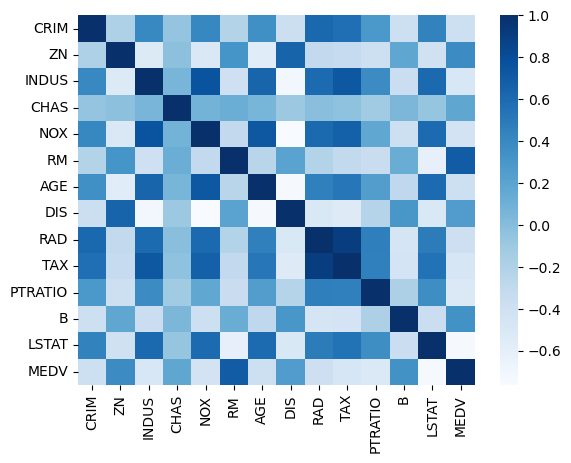

In [15]:
import seaborn as sns
sns.heatmap(data=house.corr(), cmap='Blues')

- MEDV랑 RM: 강한 양의 상관관계 >> 주택당 평균 방의 개수가 많을 수록 집값이 비싸다


- MEDV랑 LSTAT: 강한 음의 상관관계 >> 하위계층의 비율이 높을수록 집값이 싸다.

In [6]:
#회귀분석

my_formula = 'MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'
lm = ols(my_formula, data=house).fit()
print(lm.summary())
print('\nQuantities you can extract from the result: \n%s' % dir(lm))
print('\nCoefficients: \n%s' % lm.params)
print('\nCoefficient Std Errors: \n%s' % lm.bse)
print('\nAdj. R-sqaured: \n%.2f' % lm.rsquared_adj)
print('\nF-statistic: %.1f P-value: %.2f' % (lm.fvalue, lm.f_pvalue))
print('\nNumber of obs: %d Number of fitted values: %s' % (lm.nobs, len(lm.fittedvalues)))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     103.7
Date:                Thu, 20 Apr 2023   Prob (F-statistic):          3.10e-120
Time:                        19:04:03   Log-Likelihood:                -1346.3
No. Observations:                 455   AIC:                             2719.
Df Residuals:                     442   BIC:                             2772.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.6451      5.365      6.830      0.0

- RM(주택당 평균 방의 개수)이 1단위 증가하면 MEDV(집값)이 평균 3.914 증가함


- LSTAT(하위계층 비율)이 1단위 증가하면 MEDV(집값)이 평균 0.527 하락함

In [7]:
#예측하기

test_data = pd.read_csv('./Boston Housing 데이터/test.csv')
predicted = lm.predict(test_data)
predicted_rounded = [round(score, 2) for score in predicted]
print(predicted)

0     22.724850
1     32.277223
2     19.828197
3     24.575220
4     26.172434
5     31.217251
6     16.582634
7     13.589504
8     25.199346
9     22.586594
10    11.326372
11    27.655619
12    30.508583
13    21.599125
14    37.340854
15    15.397968
16    20.616308
17    27.643093
18    20.256243
19    31.270895
20    19.753159
21    13.676567
22    25.717461
23    33.883023
24    20.054473
25    24.899979
26    20.423423
27    19.491466
28    24.370834
29    18.053075
30     3.219768
31    32.291505
32    37.519070
33    21.186975
34    25.713110
35    21.335258
36    14.477137
37    25.073069
38    18.109224
39    27.561137
40    18.713331
41    18.168932
42    13.797646
43     0.660986
44    21.558298
45    19.922070
46    10.132829
47    41.559303
48    24.657519
49    16.517249
50    33.184950
dtype: float64


In [9]:
import pandas as pd

submit = pd.read_csv('./Boston Housing 데이터/sample_submission.csv')

In [11]:
submit['MEDV'] = predicted
submit.head()

,ID,MEDV
0,TEST_000,22.724850
1,TEST_001,32.277223
2,TEST_002,19.828197
3,TEST_003,24.575220
4,TEST_004,26.172434


In [13]:
submit.to_csv('./submit.csv', index=False)